## **Performance metrics**

Whenever we work with a machine learning model, it is important to quanitfy how good our model is performing. No matter the type of task, or the model that is used, we always need to measure performance and there are already predefined metrics for that. Before we analyze the metrics used in machine learning, we will talk about data splits and how we can use our dataset to validate  metrics and increase our model performance.

### **Train-validation-test split**

Imagining that we have a dataset consisting of 1000 samples and we need to train a machine learning model that is going to be widely used with new, real and important data that is obtained some time in the future. We could opt for training our model on all of our 1000 samples, since more data usually corresponds to better performance, but, how do we measure the model performance if we don't have any data left? If we needed to deploy the model as soon as possible, we could not tell if our model is going an excellent, good, mediocre or bad job at the task it was trained to do. We could test using the data that is obtained when deployed, but then, the purpose of machine learning, which is helping in decision making and finding the underlying patterns in data would not be used since we would still need to label our data and that defeats the purpose. 

To get around this, data scientists define a data split, which separates our dataset into two different datasets, the train set and the test set. The train set is the data that we use to train our model, and we use the test set to calculate the metrics that we will use to define how well our model is performing. The split is done randomly and it leads to better results. The amount of data that each split gets can vary, but it is usually between 70-30 and 80-20 for the train and test sets respectively. Let's see this in action using scikit-learn's integrated train-test split model.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
print(f'Shape of complete features: {X.shape}\nShape of complete labels: {y.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 33)
print(f'\nShape of train features: {X_train.shape}\nShape of train labels: {y_train.shape}')
print(f'Shape of test features: {X_test.shape}\nShape of test labels: {y_test.shape}')

Shape of complete features: (150, 4)
Shape of complete labels: (150,)

Shape of train features: (105, 4)
Shape of train labels: (105,)
Shape of test features: (45, 4)
Shape of test labels: (45,)


As we can see, the method created 2 different datasets with a size that corresponds to the chosen test size parameter. We can then use these datasets to train and test the performance of a model. Let's see this in action using a simple logistic regression model from scikit-learn.

In [2]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter = 400).fit(X_train, y_train)
print(f'Accuracy score on the train dataset: {clf.score(X_train, y_train):.4f}')
print(f'Accuracy score on the test dataset: {clf.score(X_test, y_test):.4f}')

Accuracy score on the train dataset: 0.9619
Accuracy score on the test dataset: 0.9333


We can see that now we have a number that describes the model's performance when predicting results on unseen data. Even though the model performs better on the training data than on the testing data (slight overfitting or high variance), the model still performs well and it can be tweaked in order to maximize our accuracy metric on the test sest. When this occurs, we might need to tune the hyperparameters of the model. The hyperparameters are manually set parameters (not to be confused with the model's internal parameters that define the mathematical relationship between our data and our target variable), that can tweak the way our model works, usually to avoid overfitting. Another interesting thing that we can do is do another split, now on the training set only, that separates this set into train and validation datasets. The train dataset is used in the exact same way as before, while the new validation dataset is the one that we calculate metrics with, but now, with the purpose of tweaking the hyperparameters until we maximize our model's performance on the validation dataset. Then, we can move over to doing the final performance evaluation on our test set and generalize the quantification of our model's performance. This has several benefits, the main one being that every step of the process works with different, unseen data, minimizing the possibility of overfitting if done correctly. Now, we can divide our train dataset into train and validation splits using the same method, as shown below.

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.14, random_state = 33)
print(f'\nShape of train features: {X_train.shape}\nShape of train labels: {y_train.shape}')
print(f'Shape of validation features: {X_val.shape}\nShape of validation labels: {y_val.shape}')
print(f'Shape of test features: {X_test.shape}\nShape of test labels: {y_test.shape}')


Shape of train features: (90, 4)
Shape of train labels: (90,)
Shape of validation features: (15, 4)
Shape of validation labels: (15,)
Shape of test features: (45, 4)
Shape of test labels: (45,)


### **Cross validation**

Cross validation is a robust technique for summarizing model performance with the purpose of comparing between models. It is a method that is robust to overfitting and can capture the true essence of how a model is doing on a specific task. Cross-validation solves an intersting question when analyzing the train-test split, how do we select which samples compose our train dataset and which will be used for testing? Cross validation solves this problem by using it all for both purposes in different runs. Cross validation is also reffered to as k-fold cross validation, in which we divide the data into k datasets with equal amount of samples, and use all but one for training, and then test the data on one of them, Then we move over to the next dataset with $\frac{n}{k}$ elements and repeat the process until we have used all k datasets for testing. We can use all of the available metrics in cross validation and it is the most useful tool for quantifying model performance for hyperparameter tuning and comparing between models. The most common cross validation method is 10-fold cross validation, where we divide the data into ten equal parts and cross validate between them. This ensures that the performance evaluation is not overfitting our training data and will be robust to new, unseen data. Let's see this in action by using scikit-learn's cross_val_score method, which calculates the accuracy metric using cross validation. 


In [4]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(clf, X, y, cv = 10)
np.set_printoptions(precision = 3)
print(f'Cross validation scores: {scores}\nMean: {scores.mean():.4f}, standard deviation: {scores.std():.4f}')

Cross validation scores: [1.    0.933 1.    1.    0.933 0.933 0.933 1.    1.    1.   ]
Mean: 0.9733, standard deviation: 0.0327


The method returns an array of scores for each cross validation fold, and we can see that the model performs better in some splits than in others. The way we interpret these results is by taking the mean of the scores and analyzing the dispersion between our data to see if there is a big gap in performance depending on the data split. Looking at our cross validation scores for the logistic regression model, we can see that, on average, the model has 97.3% accuracy, with a standard deviation of 3.27%, which indicates a great model. We can now use this data to compare different models or hyperparameter configurations. Let's run our cross validation test on random forest model to see how well it performs in comparison to the logistic regression model.

In [5]:
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier()
scores2 = cross_val_score(clf2, X, y, cv = 10)
print(f'Cross validation scores: {scores2}\nMean: {scores2.mean():.4f}, standard deviation: {scores2.std():.4f}')

Cross validation scores: [1.    0.933 1.    0.933 0.933 0.933 0.933 1.    1.    1.   ]
Mean: 0.9667, standard deviation: 0.0333


The random forest model has a lower cross validation mean score and a higher standard deviation, so we can safely conclude that for this dataset, our logistic regression model does a better job.

When doing k-fold cross validation on imbalanced class problems, like fraud detection, it is recommended that each fold has the same number of rare class samples. This is achieved through stratified sampling, and sckikit-learn's cross validation methods implement it by default.

### **Regression metrics**

Regression models have a unique set of metrics that can be used to determine model performance. These metrics can often be numeric and easy to interpret but can also vary a lot depending on the range of the data that we are working with. Let's load in a simple regression dataset and fit a linear regression model.

In [6]:
from sklearn.linear_model import LinearRegression
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/simple-Linear-Regression/master/Salary_Data.csv')
X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(f'Model predictions: {y_pred}')

Model predictions: [ 74821.416  91385.436  61938.289  81262.979  67459.629  88624.766
 113470.797  44454.045 106109.01 ]


Now that we have the model predictions and the actual values, we can assess the model performance. The most common metrics for regression are the Sum of Squared Residuals (SSR), Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE) and Coefficient of Determination (R²). The mathematical definition of these metrics are the following:
$$ SSR = \sum \limits _{i = 0} ^{n} (y_i - Y_i)^2 $$ 
$$ MAE = \frac{1}{n}\sum \limits _{i = 0} ^{n} |y_i - Y_i| $$
$$ MSE = \frac{1}{n} \sum \limits _{i = 0} ^{n} (y_i - Y_i)^2 $$
$$ RMSE = \sqrt{\frac{1}{n} \sum \limits _{i = 0} ^{n} (y_i - Y_i)^2} $$ 
$$ R^2 = 1 - \frac{SSR_{f}}{SSR_{m}} $$

where $ y_i $ and $Y_i$ are the predicted and real values respectively. $SSR_{f}$ and $ SSR_{m}$ are the sum of the squared residuals around the fit, and around the mean. Let's calculate these metrics for our linear regression model.


In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse  = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean absolute error: {mae:.2f}\nMean squared error: {mse:.2f}\nRoot mean squared error: {rmse:.2f}\nR²: {r2:.2f}')

Mean absolute error: 5146.89
Mean squared error (SSR): 39139216.00
Root mean squared error: 6256.13
R²: 0.92


From these metrics, we can get some deductions. The model has an average error of 5146.89, or 6256.13 if we penalize large errors, per sample, and our independent variable is responsible for 92% of the variation in the data. This metrics tell us that this is a very good model, however, the range of the target variable needs to be taken into account when analyzing the results for the MAE and RMSE, since an error of around 5000 is not very large when the prediction is in the range of the tens or hundreds of thousands, but it would be very large for a model whose targets are in the hundreds or thousands.

### **Classification metrics**
Classification problems have a different set of metrics to evaluate model performance. In general, these metrics are intuitive and easy to interpret and they can give us a very good guideline on how our model is doing. Lets load a simple dataset for classification and train a logistic regression model to classify the data.

In [15]:
X = iris.data
y = np.array([1 if i == 2 else 0 for i in iris.target])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 33)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

The first 2 metrics are accuracy and logistic loss. The accuracy score is the most intuitive metric and it just tells us how many of the samples were correctly classified. Logistic loss is used by models to optimize parameters, and it can also be a useful performance metric, even though it is not as intuitive. In general the lower the loss, the better. The formula for logistic loss is the following:
$$ LogLoss = -\frac{1}{N}\sum_{i=1}^N y_i log(p(y_i)) + (1-y_i) log(1-p(y_i))
It is easy to see that the loss is minimum when the probability output is very close to the actual value, and it increments as the probability drifts away from the actual label. Let's obtain these metrics for our dataset.

In [16]:
from sklearn.metrics import accuracy_score, log_loss
acc = accuracy_score(y_test, y_pred)
lg = log_loss(y_test, y_pred)

print(f'Accuracy score: {acc:.4f}\nLog loss: {lg:.4f}')

Accuracy score: 0.9333
Log loss: 2.4029


Our simple dataset has an accuracy of 93.33%, so it is a very good model, and the log loss is not that high. Now, we can move on to analyzing more complex metrics. When dealing with a binary classification problem, one interesting thing that we can do is plot the model predictions against the real labels in a matrix, called the confusion matrix. This matrix shows the amount of samples that are actual positives and predicted as positives (true positives or TP), actual negatives predicted as negatives (true negatives or TN), actual positives predicted as negatives (false negatives or FN) and actual negatives predicted as positives (false positives or FP). An ideal model would have every single sample inside the main diagonal (TP and TN) and 0 samples in the FP and FN categories. This matrix is a better way of showing results, since the accuracy does not make a clear separation between false positives and false negatives, and in machine learning problems, we almost always need to take these into account as separate to choose which one to prioritize.

Let's frame a situation. You have a model that tries to determine whether a patient has cancer or not based on some predictor variables. The model outputs the probability of a patient having cancer, and you can manually set the threshold for classification, by default, it is at 0.5, meaning that values above this probability will be classified as having cancer and values below this will be classified as not having cancer. Imagine that there is a patient that does not have cancer, but the model classifies it as a cancer patient (false positive or type I error). We would just need to make a simple medical exam made by real humans in order to determine that the patient does not have cancer and everything is okay. On the flipside, if we have a patient that does have cancer, but the model predicts it as not having cancer (false negative, or type II error), we wouldn't double check and the patient could continue on with their life, unaware of his condition, until it is too late to treat it. We would need to make sure that we reduce the amount of false negatives as much as possible, since false negatives are much more dangerous than false positives, so we could lower the probability threshold to 0.2 instead of 0.5 to ensure that even if the probability is somewhat low, we can still detect it and manually check the actual condition. 

Now, let's think about another situation, where we have a model that recommends movies that a user might like based on previously watched content, and suppose that the user is a child. We predict the probability for an R rated film and analyze the cases. If the model determines that it a movie the kid wouldn't like, and he actually would like it and it wouldn't be problematic to show him this content (false negative), then he could just stumble upon it later in life or not even know about its existence. On the other side, if the model classifies it as a movie the child would like, and in reality he wouldn't or it contains material that is not appropiate for children (false positive), we could cause a psychological impact on him and bring trouble, so in this case, false positives are more dangerous than false negatives, so we could increase the model threshold to something around 0.8 to ensure that the child would only get recommendations of movies that have a high probability of being safe for him. 

These 2 are examples of something called the precision-recall tradeoff in classification models. Recall, also known as sensitivity, is a metric that reports the true positive rate, as in how many of the samples predicted as positives are actual positives. Values close to 1 mitigate the number of false positives, while values close to 0 indicate a very high number of this type I error. It is obtained by the formula $ Recall = \frac{TP}{TP + FN}$. On the other hand, precision reports how many of the predicted positives by the model were actual positives. High values indicate a low number of false negatives while low values are indicative of a high number of type II errors. It is calculated as $ Precision = \frac{TP}{TP + FP}$. Precision is also related to the cousin of the sensitivity, the specificity. Specificity obtains the rate of samples classified as negative that are actual negatives and it helps determine the presence of false negatives. Precision can also be obtained as 1 - specificity. Often times, precision and recall are in a constant tug-of-war, since increasing one usually lowers the other, so we need to find a sweet spot or do a case analysis to figure out how much more important one is over the other. These two can be combined into a metric called the F₁ score, obtained as $F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$. It gives a combined representation of these two models, and it is really useful in cases of imbalanced datasets, since it gives a similar intuition for model performance as the accuracy, but taking the actual type of the errors into account. We can display the confusion matrix along with the precision, recall and F₁ scores for our model.

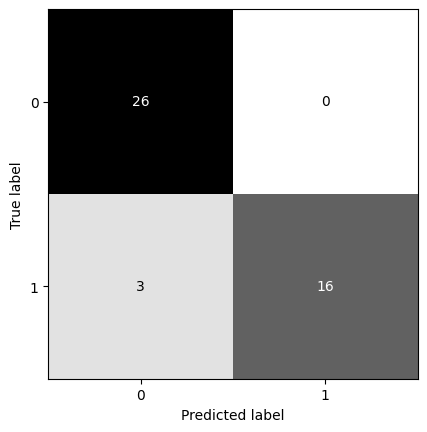

Precision: 1.0000
Recall: 0.8421
F1 score: 0.9143


In [48]:
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'binary', colorbar = False)
plt.show()
pr = precision_score(y_test, y_pred)
re = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Precision: {pr:.4f}\nRecall: {re:.4f}\nF1 score: {f1:.4f}')

The results are pretty good, and based on them, we can determine that the model has no false positives, and a few false negatives. The F₁ score is also pretty high and close to the accuracy value (0.9333). We can also use scikit-learn's classification_report method to obtain these metrics on a per-class fashion, taking into account the metrics for predictions on each class. 

In [50]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        26
           1       1.00      0.84      0.91        19

    accuracy                           0.93        45
   macro avg       0.95      0.92      0.93        45
weighted avg       0.94      0.93      0.93        45



Finally, another metric that is important in classification tasks, is the Reciever-Operating Characteristic Curve, or the ROC curve. This curve gives us a visual intuition of how the precision-recall tradeoff looks in our model. The curve is graphed on every probability threshold, and the more square it is, the better the model. This curve is usually compared against a diagonal line that indicated the result of a model with a random guess. Another key metric is the area under the ROC curve, known as ROC-AUC. This area quantifies the model's performance across all different probability thresholds and it is a very useful metric for comparing different classification models.

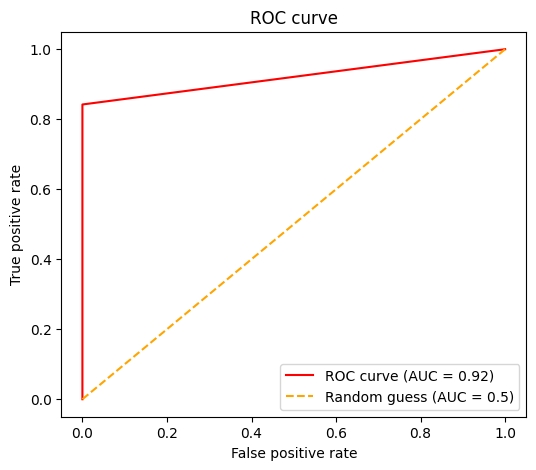

In [47]:
roc = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
# Plot ROC curve
plt.figure(figsize = (6, 5))
plt.plot(roc[0], roc[1], color = 'red', label = f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color = 'orange', linestyle = '--', label = 'Random guess (AUC = 0.5)')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In our particular case, the ROC-AUC is 0.92, meaning that the model is very good across all probability thresholds. Based on this, we could choose the best possible threshold by taking into account our priorities in term of mitigating a specific type of error.